<a href="https://colab.research.google.com/github/mahendrasaikumargandham/machine-learning-algorithms/blob/main/KMeans_Clustering_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from sklearn.cluster import KMeans
import numpy as np

In [46]:
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(X)

In [47]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [48]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0], dtype=int32)

In [49]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [50]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [51]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [52]:
df.shape

(250, 5)

In [59]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df[['Annual Income (k$)','Spending Score (1-100)']])
df_scale = pd.DataFrame(scale, columns = ['Annual Income (k$)','Spending Score (1-100)'])
df_scale.head(5)

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.003226,0.051020
3,0.003226,0.775510
4,0.006452,0.397959


In [64]:
km = KMeans(n_clusters = 2)
y_predict = km.fit_predict(df_scale[['Annual Income (k$)','Spending Score (1-100)']])
y_predict

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1], dtype=int32)

In [67]:
km.cluster_centers_

array([[0.24758653, 0.29040667],
       [0.27499286, 0.75961712]])

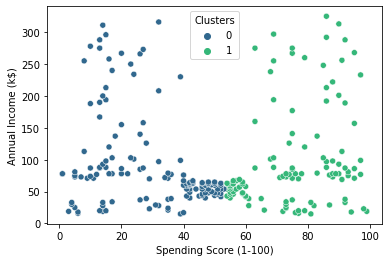

In [71]:
df['Clusters'] = km.labels_
sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)",hue = 'Clusters',  data=df,palette='viridis')

In [76]:
K = range(2, 12)
wss = []

for k in K:
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans = kmeans.fit(df_scale)
  wss_iter = kmeans.inertia_
  wss.append(wss_iter)

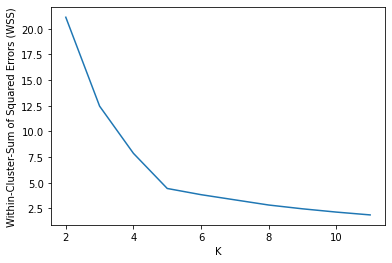

In [80]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K, wss)

In [82]:
km = KMeans(n_clusters = 5)
y_predicted = km.fit_predict(df_scale[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

array([3, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 3, 0, 1, 3, 1,
       0, 1, 0, 1, 3, 3, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 1, 3, 1, 0, 1, 0, 1,
       3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2], dtype=int32)

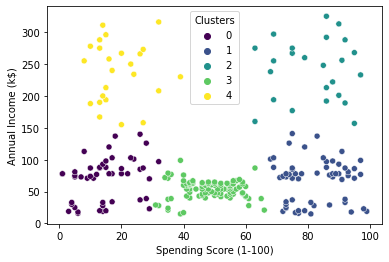

In [84]:
df['Clusters'] = km.labels_
sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)",hue = 'Clusters',  data=df,palette='viridis')